# 7 Study
This section explores the degree to which field of study was associated with decision. Not sure if there is anything worth pursuing here.

In [1]:
# libraries
%matplotlib inline

import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
projdir = os.path.dirname(currentdir)
srcdir = os.path.join(projdir,"src")
datasrc = os.path.join(srcdir, "data")

sys.path.insert(0,currentdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)
sys.path.insert(0,datasrc)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description
import warnings
warnings.filterwarnings('ignore')

## 7.2 Data

In [2]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
study = ['field_label', 'field_cd', 'field_cd_o', 'same_field']
df_study = df[study]
df_male_study = df_male[study]
df_female_study = df_female[study]
#Drop NA
df_study = df_study.dropna()
df_male_study = df_male_study.dropna()
df_female_study = df_female_study.dropna()

## 7.3 Univariate Analysis
- Top 5 fields were Business, Law, MBA, Social Work and International Affairs. 
- About 12% of the couples had the same field


,field_label
Business/Econ/Finance,1957
Biological Sciences/Chemistry/Physics,993
Engineering,817
Political Science/International Affairs,705
"Social Science, Psychologist",689
Law,657
"Education, Academia",618
Social Work,468
English/Creative Writing/ Journalism,323
History/Religion/Philosophy,241


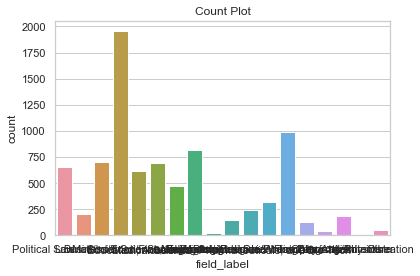

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
field_cd,8252.0,0,1.0,5.0,7.685894,8.0,10.0,18.0,0.0,0.0,-3.0,1.0,Fail to Reject H0


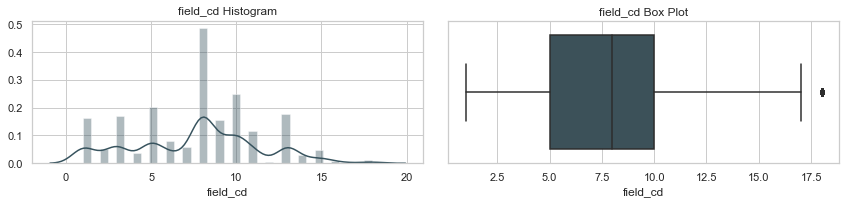

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
field_cd_o,8252.0,0,1.0,5.0,7.685531,8.0,10.0,18.0,0.0,0.0,-3.0,1.0,Fail to Reject H0


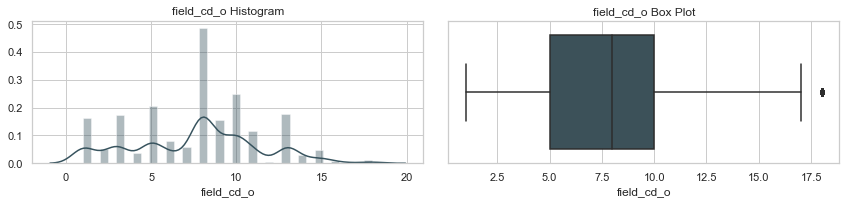

,No,Yes,missing
same_field,7273,979,0


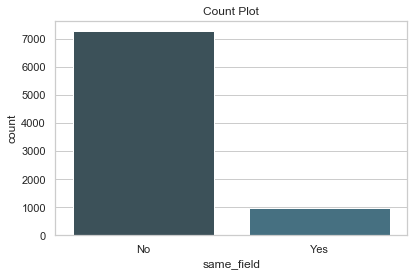

In [3]:
result = univariate.analysis(df_study)
for r in result:
    r['desc']
    r['plot']


## 7.4 Bivariate Analysis

### 7.4.1 Subject Decision by Field
- Top 5 in terms of positive choice...
- Bottom 5

In [4]:
i, d, p = bivariate.analysis(x='field_label', y='dec', df=df)
d['pct'].sort_values(by='Yes', ascending=False)
i

dec,No,Yes
field_label,,
Film,0.460317,0.539683
"Medical Science, Pharmaceuticals, and Bio Tech",0.531469,0.468531
Engineering,0.533253,0.466747
Law,0.536842,0.463158
"Education, Academia",0.546326,0.453674
"Social Science, Psychologist",0.551724,0.448276
Biological Sciences/Chemistry/Physics,0.564955,0.435045
Other,0.576923,0.423077
All,0.579314,0.420686


,x,y,p-Value,Cramer's V,Strength,Result
0,field_label,dec,3.395565e-08,0.064345,Very Weak Association,Significant


### 7.4.2 Partner Decision by Field
- Top 5 in terms of positive choice...
- Bottom 5

In [5]:
i, d, p = bivariate.analysis(x='field_label', y='dec_o', df=df)
d['pct'].sort_values(by='Yes', ascending=False)
d['count']
i

dec_o,No,Yes
field_label,,
Languages,0.200000,0.800000
"Medical Science, Pharmaceuticals, and Bio Tech",0.349650,0.650350
Other,0.480769,0.519231
Business/Econ/Finance,0.554266,0.445734
Political Science/International Affairs,0.557123,0.442877
Law,0.563910,0.436090
English/Creative Writing/ Journalism,0.575385,0.424615
History/Religion/Philosophy,0.576763,0.423237
Undergrad/undecided,0.578947,0.421053


dec_o,No,Yes,All,pct
field_label,,,,
Architecture,6,4,10,0.12
Biological Sciences/Chemistry/Physics,581,412,993,11.94
Business/Econ/Finance,1098,883,1981,23.82
"Education, Academia",389,237,626,7.53
Engineering,555,272,827,9.95
English/Creative Writing/ Journalism,187,138,325,3.91
Film,77,49,126,1.52
Fine Arts/Arts Administration,114,73,187,2.25
History/Religion/Philosophy,139,102,241,2.90


,x,y,p-Value,Cramer's V,Strength,Result
0,field_label,dec_o,3.231597e-14,0.078458,Very Weak Association,Significant


### 7.4.3 Decision by Same Field
slight association

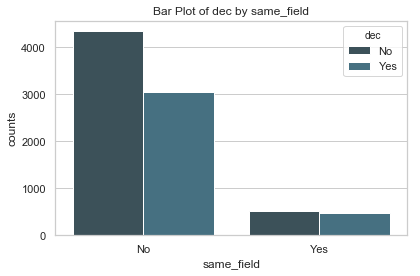

dec,No,Yes
same_field,,
No,0.587917,0.412083
Yes,0.520940,0.479060
All,0.580091,0.419909


,x,y,p-Value,Cramer's V,Strength,Result
0,same_field,dec,0.000076,0.03056,Very Weak Association,Significant


In [6]:
i, d, p = bivariate.analysis(x='same_field', y='dec', df=df)
p
d['pct']
i